In [148]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [149]:
img = cv2.imread('image_1.jpg')
img_RGB = cv2.cvtColor (img, cv2.COLOR_BGR2RGB) # Преобразовать в RGB для последующего отображения
 # Обработка оттенков серого изображения
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### Метод Собеля

In [150]:
# Оператор Собеля
x = cv2.Sobel(grayImage, cv2.CV_16S, 1, 0)
y = cv2.Sobel(grayImage, cv2.CV_16S, 0, 1)
# вернуться к uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#### Метод Лапласа

In [151]:
# Оператор Лапласа
x = cv2.Laplacian(grayImage, cv2.CV_16S)
y = cv2.Laplacian(grayImage, cv2.CV_16S)
# вернуться к uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Laplacian = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#### Метод Робертса

In [152]:
# Оператор Робертса
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
kernely = np.array([[0, -1], [1, 0]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
 # Turn uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#### Метод Канни

In [153]:
detected_edges = cv2.GaussianBlur(grayImage,(3,3),0)
detected_edges = cv2.Canny(grayImage,100,250,L2gradient=False)

#### Отображение графики

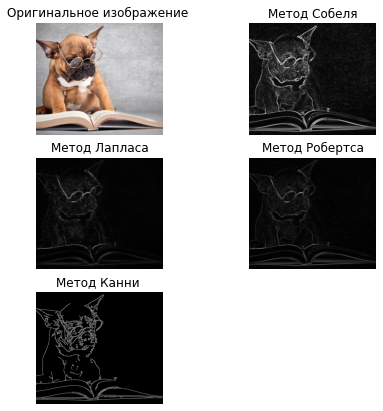

In [154]:
fig = plt.figure(figsize=(7, 7))
rows = 3
columns = 2

# Отображение графики
titles = [u'Оригинальное изображение ', u'Метод Собеля', u'Метод Лапласа', u'Метод Робертса', u'Метод Канни ']
images = [img_RGB, Sobel, Laplacian, Roberts, detected_edges]
for i in range(5):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(images[i] , 'gray')
    plt.axis('off')
    plt.title(titles[i])
plt.show()